## Project 06
### James Grasell
### May 10, 2021

Fetal Health Classification
Dataset: https://www.kaggle.com/andrewmvd/fetal-health-classification (Links to an external site.)

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were classified by three expert obstetricians into 3 classes:

Normal
Suspect
Pathological
Your task is to train a neural network as follows:

1) Perform a preliminary analysis on the dataset to determine which attributes have the highest correlation with the target variable. Use graphs to visualize the results.

2) Plot a histogram for the class distributions.

3) Clean the dataset by handling missing data values, scaling, encoding, etc., as necessary.

4) Create a sequential neural model.

5) Evaluate the model and display the classification scores and the confusion matrix.

6) Plot the model's accuracy/loss values as well as the validated accuracy/loss values during training.

7) Cross-validate the NN model, and calculate the mean accuracy of the folds.

8) Experiment with # hidden layers, # nodes / hidden layer, batch size, etc. to see which combinations produce a better accuracy. You may use grid search, if you wish.

9) Summarize your findings. As a sample of what is expected, please see this document:

https://github.com/bforoura/AML/blob/master/sample_project_summaries.ipynb (Links to an external site.)

10) Submit the link to your well-documented GitHub Jupyter notebook report. 

In [26]:
# import and review the first 5 records
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/jimgrasell/AML/master/Project06/Data/fetal_health.csv'
df = pd.read_csv(url)

df.head(5)

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [2]:
# describe each feature and the target

df.describe()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


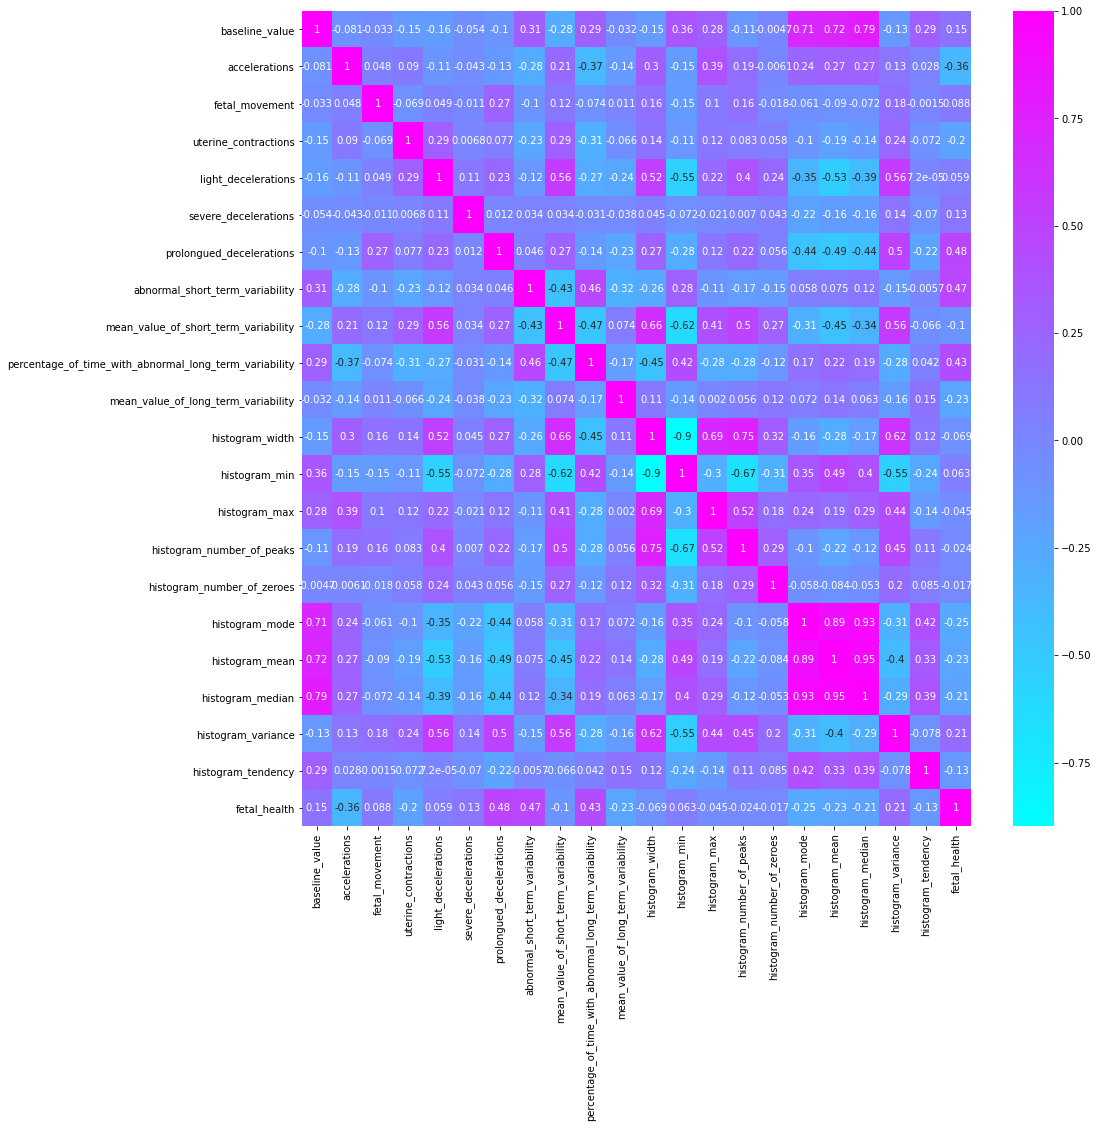

In [3]:
# correlations between the features and the target
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
g = sns.heatmap(df.corr(),
                annot=True, 
                cmap = "cool")


The correlation heat map indicates that the following features are moderately correlated with fetal_health

accelerations, 
prolonged_decelerations, 
abnormal_short_term_variability, 
and percentage_of_time_with_abnormal_long_term_variability

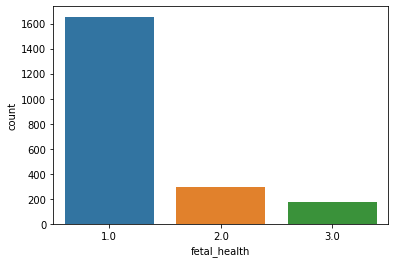

In [4]:
# distribution of the target variable fetal health.
# the data is highly unbalanced with the majority of cases labeled as 1

import seaborn as sns

sns.countplot(x=df.fetal_health)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

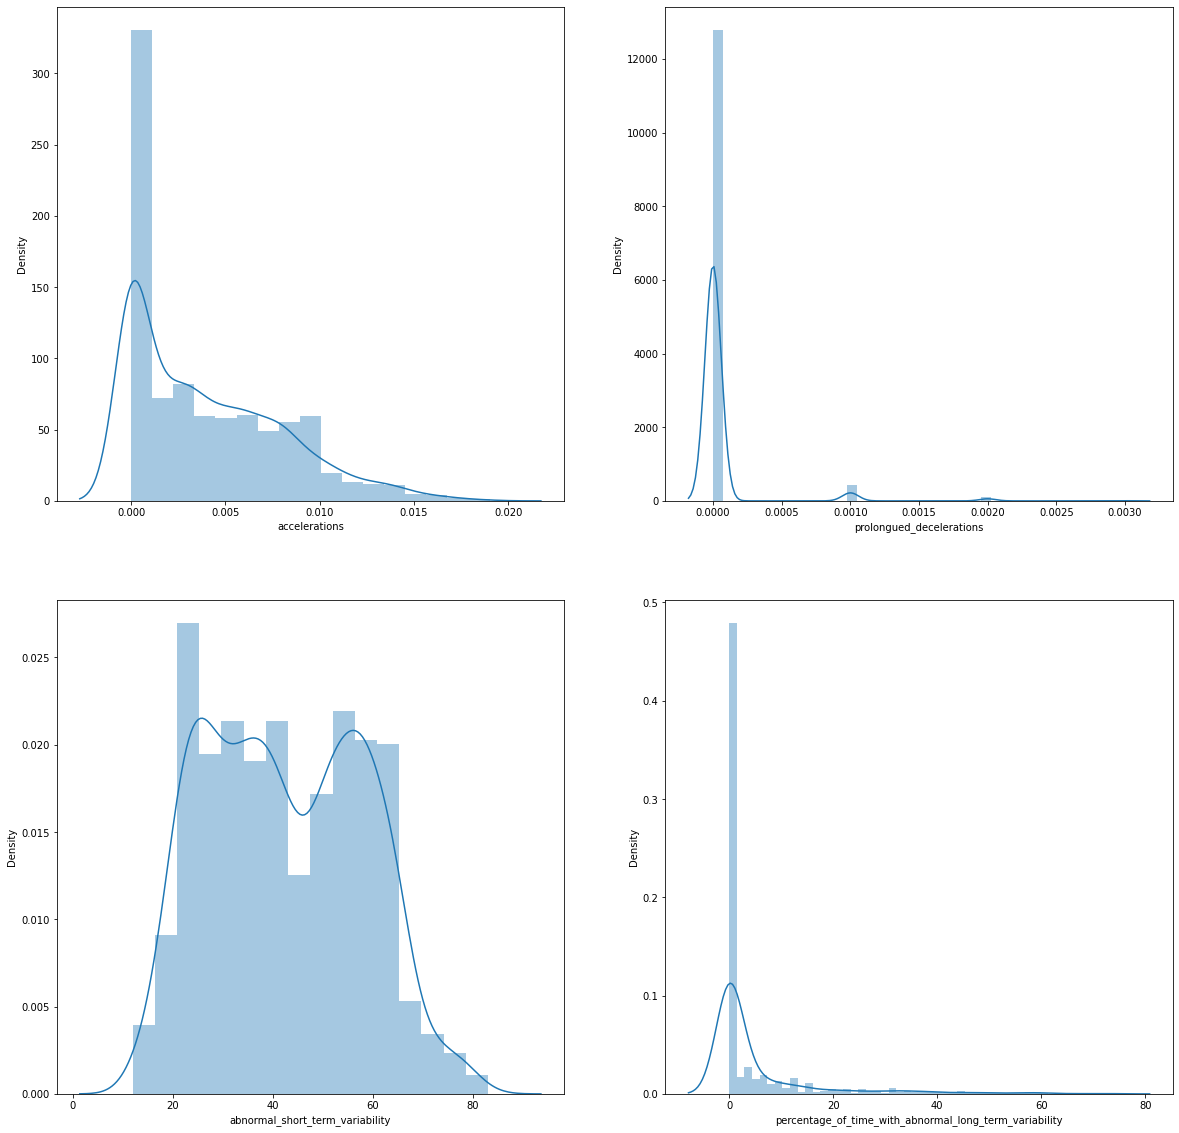

In [5]:
# distributions for the 4 features with the highest correlations
# when fetal_health = 1

import matplotlib.pyplot as plt

f, axes = plt.subplots(2,2, figsize=(20,20))

sns.distplot(df[df.fetal_health == 1].accelerations, ax=axes[0,0])
sns.distplot(df[df.fetal_health == 1].prolongued_decelerations, ax=axes[0,1])
sns.distplot(df[df.fetal_health == 1].abnormal_short_term_variability, ax=axes[1,0])
sns.distplot(df[df.fetal_health == 1].percentage_of_time_with_abnormal_long_term_variability, ax=axes[1,1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

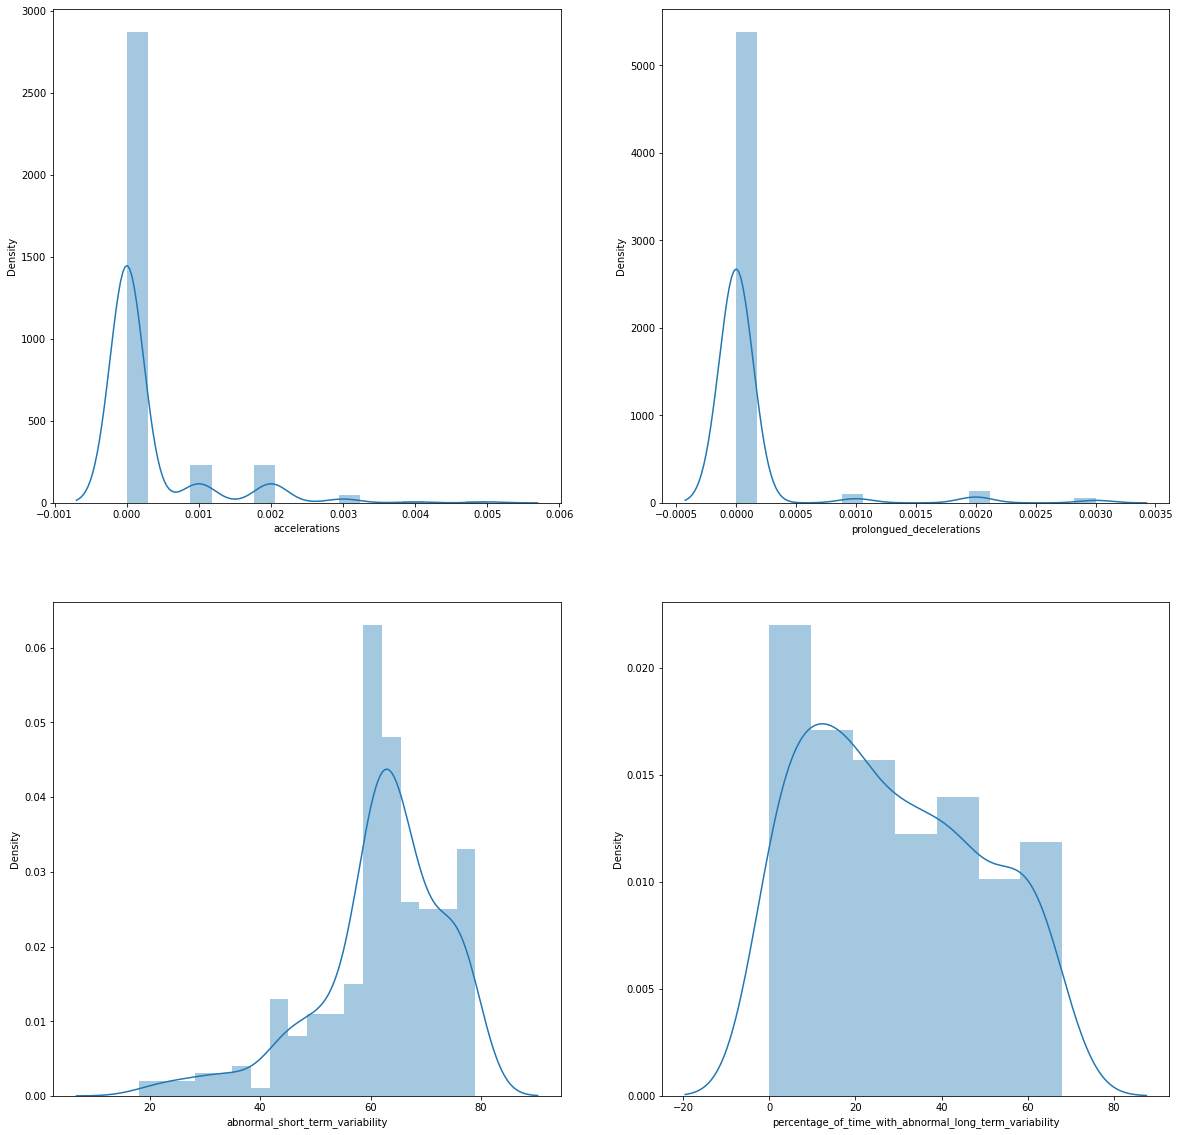

In [6]:
# distributions for the 4 features with the highest correlations
# when fetal_health = 2

import matplotlib.pyplot as plt

f, axes = plt.subplots(2,2, figsize=(20,20))

sns.distplot(df[df.fetal_health == 2].accelerations, ax=axes[0,0])
sns.distplot(df[df.fetal_health == 2].prolongued_decelerations, ax=axes[0,1])
sns.distplot(df[df.fetal_health == 2].abnormal_short_term_variability, ax=axes[1,0])
sns.distplot(df[df.fetal_health == 2].percentage_of_time_with_abnormal_long_term_variability, ax=axes[1,1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

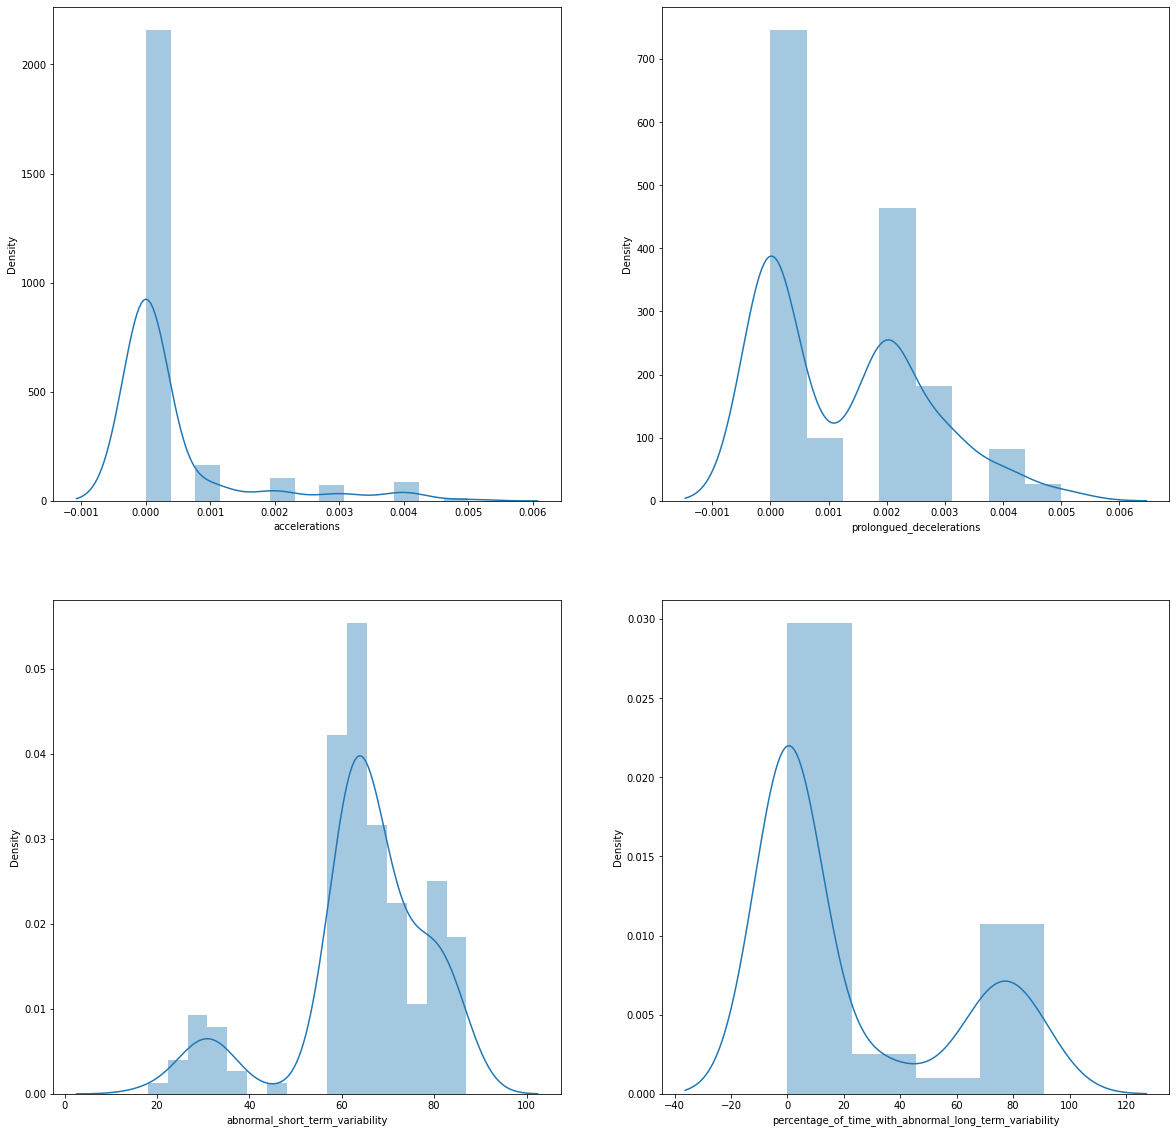

In [7]:
# distributions for the 4 features with the highest correlations
# when fetal_health = 3

import matplotlib.pyplot as plt

f, axes = plt.subplots(2,2, figsize=(20,20))

sns.distplot(df[df.fetal_health == 3].accelerations, ax=axes[0,0])
sns.distplot(df[df.fetal_health == 3].prolongued_decelerations, ax=axes[0,1])
sns.distplot(df[df.fetal_health == 3].abnormal_short_term_variability, ax=axes[1,0])
sns.distplot(df[df.fetal_health == 3].percentage_of_time_with_abnormal_long_term_variability, ax=axes[1,1])

In [29]:
# use StandardScaler for all numeric features (X)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

label = LabelEncoder()
label.fit(df['fetal_health'])
df['fetal_health'] = label.transform(df['fetal_health'])

# remove the dependent (predictor) parameter from the training set
X = df.drop(columns='fetal_health')
y = df['fetal_health']

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# set aside the normalized data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, stratify=y, test_size=0.3, random_state=22)

print('TRAIN: {} & {}'.format(X_train.shape, y_train.shape))
print('TEST:  {} & {}'.format(X_test.shape, y_test.shape))

val_len = int(X_train.shape[0]*0.1)

y_train = y_train.values
y_test = y_test.values


TRAIN: (1488, 21) & (1488,)
TEST:  (638, 21) & (638,)


In [34]:
# multi-class classification with Keras
import pandas
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

model_0 = Sequential()
model_0.add(Dense(64, activation='relu', input_dim = 21 ) )
model_0.add(Dense(32, activation='relu'))
model_0.add(Dense(16, activation='relu'))
model_0.add(Dense(3, activation='softmax'))

model_1 = Sequential()
model_1.add(Dense(128, activation='relu', input_dim = 21 ) )
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(3, activation='softmax'))

model_2 = Sequential()
model_2.add(Dense(32, activation='relu', input_dim = 21 ) )
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(3, activation='softmax'))

In [35]:
models = [model_0, model_1, model_2]

Epoch 1/20
335/335 [==============================] - 1s 2ms/step - loss: 0.6293 - accuracy: 0.8008 - val_loss: 0.2624 - val_accuracy: 0.8851
Epoch 2/20
335/335 [==============================] - 1s 2ms/step - loss: 0.2788 - accuracy: 0.8981 - val_loss: 0.2302 - val_accuracy: 0.9054
Epoch 3/20
335/335 [==============================] - 1s 2ms/step - loss: 0.2304 - accuracy: 0.9160 - val_loss: 0.2314 - val_accuracy: 0.8716
Epoch 4/20
335/335 [==============================] - 1s 2ms/step - loss: 0.2047 - accuracy: 0.9119 - val_loss: 0.1949 - val_accuracy: 0.8986
Epoch 5/20
335/335 [==============================] - 1s 2ms/step - loss: 0.2094 - accuracy: 0.9133 - val_loss: 0.1812 - val_accuracy: 0.9054
Epoch 6/20
335/335 [==============================] - 1s 2ms/step - loss: 0.1860 - accuracy: 0.9329 - val_loss: 0.2106 - val_accuracy: 0.8851
Epoch 7/20
335/335 [==============================] - 1s 2ms/step - loss: 0.1673 - accuracy: 0.9267 - val_loss: 0.1760 - val_accuracy: 0.9189
Epoch 

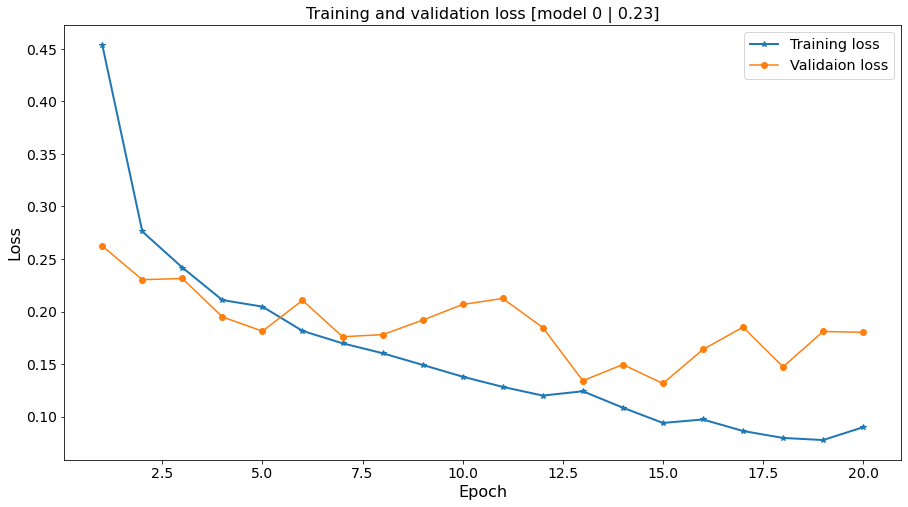

<Figure size 432x288 with 0 Axes>

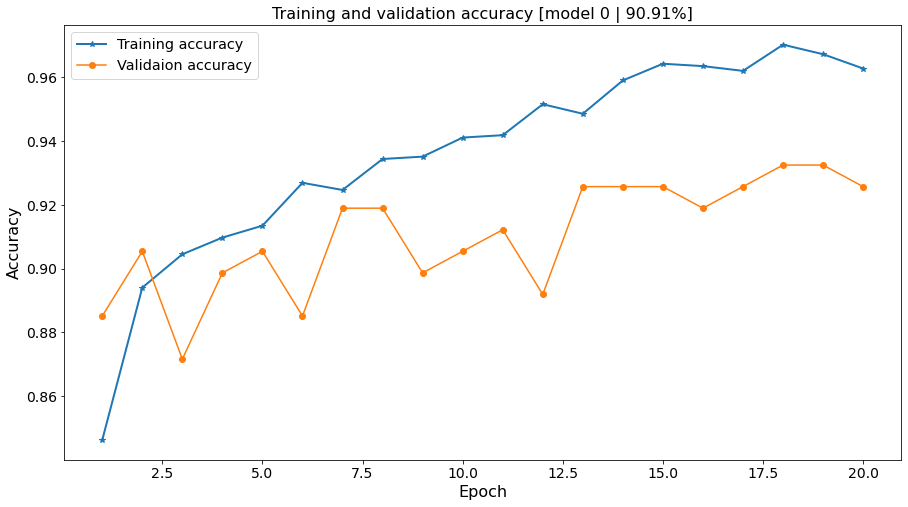

Epoch 1/20
335/335 [==============================] - 1s 2ms/step - loss: 0.6680 - accuracy: 0.7674 - val_loss: 0.2849 - val_accuracy: 0.8851
Epoch 2/20
335/335 [==============================] - 1s 2ms/step - loss: 0.2777 - accuracy: 0.8929 - val_loss: 0.2719 - val_accuracy: 0.8986
Epoch 3/20
335/335 [==============================] - 1s 2ms/step - loss: 0.2245 - accuracy: 0.9004 - val_loss: 0.2432 - val_accuracy: 0.8784
Epoch 4/20
335/335 [==============================] - 1s 2ms/step - loss: 0.2178 - accuracy: 0.9119 - val_loss: 0.1821 - val_accuracy: 0.8919
Epoch 5/20
335/335 [==============================] - 1s 2ms/step - loss: 0.1820 - accuracy: 0.9150 - val_loss: 0.2916 - val_accuracy: 0.9054
Epoch 6/20
335/335 [==============================] - 1s 2ms/step - loss: 0.1763 - accuracy: 0.9233 - val_loss: 0.2294 - val_accuracy: 0.9122
Epoch 7/20
335/335 [==============================] - 1s 2ms/step - loss: 0.1788 - accuracy: 0.9212 - val_loss: 0.2424 - val_accuracy: 0.9189
Epoch 

<Figure size 432x288 with 0 Axes>

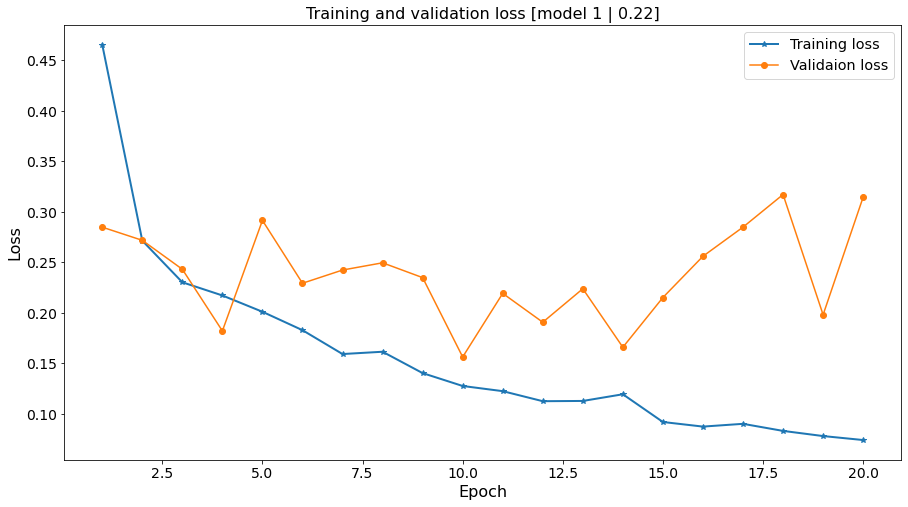

<Figure size 432x288 with 0 Axes>

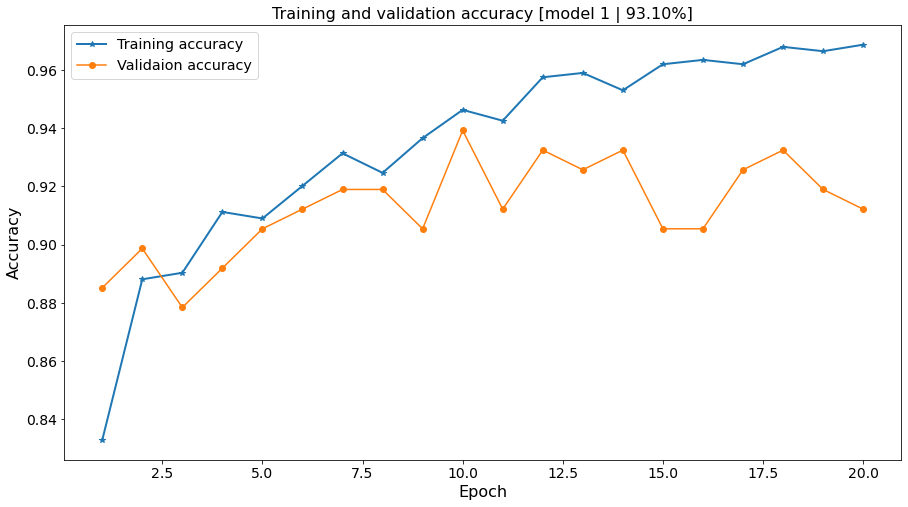

Epoch 1/20
335/335 [==============================] - 1s 2ms/step - loss: 0.6684 - accuracy: 0.8025 - val_loss: 0.3809 - val_accuracy: 0.8581
Epoch 2/20
335/335 [==============================] - 1s 2ms/step - loss: 0.3574 - accuracy: 0.8702 - val_loss: 0.3078 - val_accuracy: 0.8919
Epoch 3/20
335/335 [==============================] - 1s 2ms/step - loss: 0.2620 - accuracy: 0.9191 - val_loss: 0.2720 - val_accuracy: 0.8919
Epoch 4/20
335/335 [==============================] - 1s 2ms/step - loss: 0.2726 - accuracy: 0.8856 - val_loss: 0.2569 - val_accuracy: 0.9122
Epoch 5/20
335/335 [==============================] - 1s 2ms/step - loss: 0.2344 - accuracy: 0.9204 - val_loss: 0.2409 - val_accuracy: 0.9122
Epoch 6/20
335/335 [==============================] - 1s 2ms/step - loss: 0.2484 - accuracy: 0.8977 - val_loss: 0.2212 - val_accuracy: 0.9122
Epoch 7/20
335/335 [==============================] - 1s 2ms/step - loss: 0.2231 - accuracy: 0.9090 - val_loss: 0.2196 - val_accuracy: 0.8851
Epoch 

<Figure size 432x288 with 0 Axes>

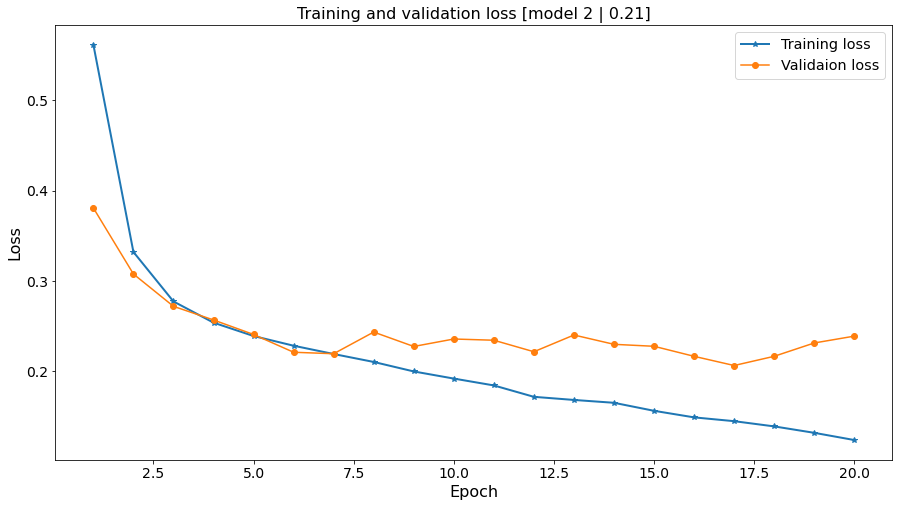

<Figure size 432x288 with 0 Axes>

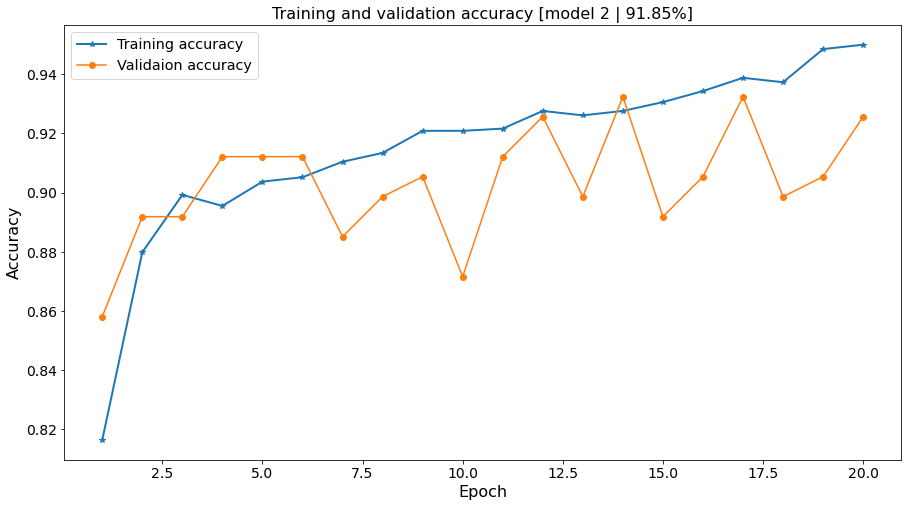

<Figure size 432x288 with 0 Axes>

In [36]:
for m,model in enumerate(models):
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
                 )

    X_val = X_train[:val_len]
    y_val = y_train[:val_len]

    X_train_cut = X_train[val_len:]
    y_train_cut = y_train[val_len:]
    
    # callback to stop the training if no improvement for 5 consecutive epochs
    callback = keras.callbacks.EarlyStopping(monitor='loss', 
                                             patience=5)

    history = model.fit(X_train_cut, y_train_cut, 
                        epochs=20,
                        batch_size=4,
                        validation_data=(X_val, y_val),
                        callbacks=[callback],
                        #verbose=0
                       )
    
    result = model.evaluate(X_test, y_test)
    print('\nMODEL {}:\n{}'.format(m,result))

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    metrics = history.history['accuracy']
    epochs = range(1, len(metrics) + 1) 

    plt.figure(figsize=(15,8))
    plt.plot(epochs, loss, color='tab:blue', linestyle='-', linewidth=2, marker='*', label='Training loss')
    plt.plot(epochs, val_loss, color='tab:orange', linestyle='-', marker='o', label='Validaion loss')
    plt.title('Training and validation loss [model {} | {:.2f}]'.format(m,result[0]), fontsize=16)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.legend(loc='upper right', fontsize='x-large')
    plt.tick_params(labelsize=14)
    plt.show()
    plt.clf()
    
    plt.figure(figsize=(15,8))
    plt.plot(epochs, accuracy, color='tab:blue', linestyle='-', linewidth=2, marker='*', label='Training accuracy')
    plt.plot(epochs, val_accuracy, color='tab:orange', linestyle='-', marker='o', label='Validaion accuracy')
    plt.title('Training and validation accuracy [model {} | {:.2f}%]'.format(m,result[1]*100), fontsize=16)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.legend(loc='upper left', fontsize='x-large')
    plt.tick_params(labelsize=14)
    plt.show()
    plt.clf()

# Summary

*   Standized the features (X)
*   Ran 3 Sequential Models
  * Model_0 Dense Layers 64, 32, 16, 3 relu and softmax (accuracy = 90.91%
  * Model_1 Dense Layers 128, 64, 16, 3 relu and softmax (accuracy = 93.10%)
  * Model_2 Dense Layers 32, 16, 16, 3 relu and softmax (accuracy = 91.85%)

Model_1 had the highest accuracy, but there are signs that the model might be over fitting the training data. Validation accuracy started to decline prior to termination. Stopping at 8 epochs is recommended to avoid the overfitting problem.

Model_2 validation accuracy was unstable rising and falling. This could be an indicator that the size of thje dense layers were too small.

Model_0 Training and Validation accuracy started to diverge after the 7 epoch. Overfitting starts to become a problem after 8 epochs.

Conclusion: Model_1 terminated at 8 epochs is the best model in this analysis.